# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import csv
import requests
from io import StringIO
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 9.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/MLOps/ulasan_apk.csv')

In [4]:
df.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,31418d00-cebe-4996-a279-9a5cfb2e9e61,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Asli berguna juga programnya dan internalnya l...,5,2,3.28.0,2025-10-14 15:31:39,"Hi Sobat SeaBank, mohon maaf atas ketidaknyama...",2025-10-14 18:28:28,3.28.0
1,868e54f7-05fb-4f9a-896c-0a8ab6cd95cd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Asli simpel juga, programnya dan interlnya leb...",5,1,3.28.0,2025-10-14 16:03:40,"Hi Sobat SeaBank, mohon maaf atas ketidaknyama...",2025-10-14 18:29:51,3.28.0
2,0f632e94-c28f-46c9-aa54-15597e4b3f91,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Asli oke juga, program & internalnya lebih fle...",5,1,3.28.0,2025-10-15 16:54:22,NaN,NaN,3.28.0
3,77e863c8-9ac0-42de-8be2-489024a30451,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Asli berguna banget! programnya dan internalny...,5,1,3.28.0,2025-10-15 17:37:00,NaN,NaN,3.28.0
4,017e2f67-8d00-4739-9373-b195bbdc2f86,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Asli praktis sekali! Programnya dan internalny...,5,0,3.28.0,2025-10-15 22:39:31,NaN,NaN,3.28.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              20000 non-null  object
 1   userName              20000 non-null  object
 2   userImage             20000 non-null  object
 3   content               20000 non-null  object
 4   score                 20000 non-null  int64 
 5   thumbsUpCount         20000 non-null  int64 
 6   reviewCreatedVersion  18177 non-null  object
 7   at                    20000 non-null  object
 8   replyContent          9396 non-null   object
 9   repliedAt             9396 non-null   object
 10  appVersion            18177 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.7+ MB


In [6]:
df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,1823
at,0
replyContent,10604
repliedAt,10604


In [7]:
df.describe()

,score,thumbsUpCount
count,20000.000000,20000.00000
mean,3.996650,4.86570
std,1.592189,59.08568
min,1.000000,0.00000
25%,3.000000,0.00000
50%,5.000000,0.00000
75%,5.000000,1.00000
max,5.000000,4893.00000


In [8]:
df.duplicated().sum()

np.int64(0)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
#membuang kolom yang kurang tidak diperlukan
df=df.drop(columns=['reviewCreatedVersion', 'replyContent', 'repliedAt', 'appVersion'])

In [10]:
#menghapus data kosong dan data duplikat
df=df.dropna()
df=df.drop_duplicates()

In [11]:
kata_slang = pd.read_excel('/content/drive/MyDrive/MLOps/slangword.xlsx')
kamus_slang = dict(zip(kata_slang['kata1'], kata_slang['kata2']))
def ganti_slang(teks):
    return ' '.join([kamus_slang.get(kata, kata) for kata in teks.split()])

def cleaning_teks(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefolding_teks(text):
    text = text.lower()
    return text

def tokenizing_teks(text):
    text = word_tokenize(text)
    return text

def filtering_teks(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemming_teks(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text
    return stemmed_text

def sentence_teks(list_kata):
    sentence = ' '.join(word for word in list_kata)
    return sentence

In [12]:
df['text_clean'] = df['content'].apply(cleaning_teks)
df['text_casefolding_teks'] = df['text_clean'].apply(casefolding_teks)
df['text_normalized'] = df['text_casefolding_teks'].apply(ganti_slang)
df['text_tokenizing_teks'] = df['text_normalized'].apply(tokenizing_teks)
df['text_stopword'] = df['text_tokenizing_teks'].apply(filtering_teks)
df['text_akhir'] = df['text_stopword'].apply(sentence_teks)

In [13]:
lexicon_positive = dict()
respon = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if respon.status_code == 200:
    reader = csv.reader(StringIO(respon.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")
lexicon_negative = dict()
respon = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if respon.status_code == 200:
    reader = csv.reader(StringIO(respon.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [14]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for kata in text:
        if (kata in lexicon_positive):
            score = score + lexicon_positive[kata]
    for kata in text:
        if (kata in lexicon_negative):
            score = score + lexicon_negative[kata]
    polarity=''
    if (score >= 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [15]:
hasil = df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
hasil = list(zip(*hasil))
df['polarity_score'] = hasil[0]
df['polarity'] = hasil[1]

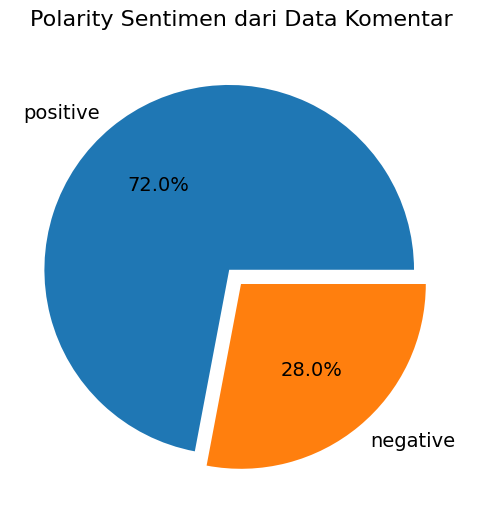

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
sizes = [count for count in df['polarity'].value_counts()]
labels = list(df['polarity'].value_counts().index)
explode = (0.1, 0)
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Polarity Sentimen dari Data Komentar', fontsize=16, pad=20)
plt.show()

In [17]:
df.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,at,text_clean,text_casefolding_teks,text_normalized,text_tokenizing_teks,text_stopword,text_akhir,polarity_score,polarity
0,31418d00-cebe-4996-a279-9a5cfb2e9e61,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Asli berguna juga programnya dan internalnya l...,5,2,2025-10-14 15:31:39,Asli berguna juga programnya dan internalnya l...,asli berguna juga programnya dan internalnya l...,asli berguna juga programnya dan internalnya l...,"[asli, berguna, juga, programnya, dan, interna...","[asli, berguna, programnya, internalnya, memad...",asli berguna programnya internalnya memadai di...,15,positive
1,868e54f7-05fb-4f9a-896c-0a8ab6cd95cd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Asli simpel juga, programnya dan interlnya leb...",5,1,2025-10-14 16:03:40,Asli simpel juga programnya dan interlnya lebi...,asli simpel juga programnya dan interlnya lebi...,asli simpel juga programnya dan interlnya lebi...,"[asli, simpel, juga, programnya, dan, interlny...","[asli, simpel, programnya, interlnya, tertata,...",asli simpel programnya interlnya tertata digun...,22,positive
2,0f632e94-c28f-46c9-aa54-15597e4b3f91,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Asli oke juga, program & internalnya lebih fle...",5,1,2025-10-15 16:54:22,Asli oke juga program internalnya lebih fleks...,asli oke juga program internalnya lebih fleks...,asli oke juga program internalnya lebih fleksi...,"[asli, oke, juga, program, internalnya, lebih,...","[asli, oke, program, internalnya, fleksibel, p...",asli oke program internalnya fleksibel pakaibe...,10,positive
3,77e863c8-9ac0-42de-8be2-489024a30451,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Asli berguna banget! programnya dan internalny...,5,1,2025-10-15 17:37:00,Asli berguna banget programnya dan internalnya...,asli berguna banget programnya dan internalnya...,asli berguna banget programnya dan internalnya...,"[asli, berguna, banget, programnya, dan, inter...","[asli, berguna, banget, programnya, internalny...",asli berguna banget programnya internalnya mem...,1,positive
4,017e2f67-8d00-4739-9373-b195bbdc2f86,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Asli praktis sekali! Programnya dan internalny...,5,0,2025-10-15 22:39:31,Asli praktis sekali Programnya dan internalnya...,asli praktis sekali programnya dan internalnya...,asli praktis sekali programnya dan internalnya...,"[asli, praktis, sekali, programnya, dan, inter...","[asli, praktis, programnya, internalnya, memad...",asli praktis programnya internalnya memadai di...,-2,negative
